In [24]:
import scipy.stats as stats
import numpy as np

import xarray as xr
import matplotlib.pyplot as plt

In [23]:
from dask.distributed import Client, wait
# client.close()
client = Client(n_workers=80, threads_per_worker=1, memory_limit=None) 
client

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 45311 instead
  warnings.warn(


 - State start
 -   Scheduler at:     tcp://127.0.0.1:45747
 -   dashboard at:        /proxy/45311/status
 - Registering Worker plugin shuffle
 -         Start Nanny at: 'tcp://127.0.0.1:46877'
 -         Start Nanny at: 'tcp://127.0.0.1:35643'
 -         Start Nanny at: 'tcp://127.0.0.1:45909'
 -         Start Nanny at: 'tcp://127.0.0.1:37347'
 -         Start Nanny at: 'tcp://127.0.0.1:43987'
 -         Start Nanny at: 'tcp://127.0.0.1:43531'
 -         Start Nanny at: 'tcp://127.0.0.1:46853'
 -         Start Nanny at: 'tcp://127.0.0.1:42595'
 -         Start Nanny at: 'tcp://127.0.0.1:43707'
 -         Start Nanny at: 'tcp://127.0.0.1:34819'
 -         Start Nanny at: 'tcp://127.0.0.1:45545'
 -         Start Nanny at: 'tcp://127.0.0.1:36849'
 -         Start Nanny at: 'tcp://127.0.0.1:39237'
 -         Start Nanny at: 'tcp://127.0.0.1:41861'
 -         Start Nanny at: 'tcp://127.0.0.1:40397'
 -         Start Nanny at: 'tcp://127.0.0.1:42549'
 -         Start Nanny at: 'tcp://127.0.0

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/45311/status,
Dashboard: /proxy/45311/status,Workers: 80
Total threads: 80,Total memory: 0 B
Status: running,Using processes: True
Comm: tcp://127.0.0.1:45747,Workers: 80
Dashboard: /proxy/45311/status,Total threads: 80
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:36853,Total threads: 1
Dashboard: /proxy/36083/status,Memory: 0 B
Nanny: tcp://127.0.0.1:46877,


 - Connection to tcp://127.0.0.1:34802 has been closed.
 - Remove worker <WorkerState 'tcp://127.0.0.1:42355', name: 73, status: running, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1740113371.3684666')
 - Connection to tcp://127.0.0.1:34898 has been closed.
 - Remove worker <WorkerState 'tcp://127.0.0.1:41773', name: 69, status: running, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1740113371.3740804')
 - Connection to tcp://127.0.0.1:34776 has been closed.
 - Remove worker <WorkerState 'tcp://127.0.0.1:43259', name: 54, status: running, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1740113371.3766096')
 - Connection to tcp://127.0.0.1:34526 has been closed.
 - Remove worker <WorkerState 'tcp://127.0.0.1:38017', name: 37, status: running, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1740113371.378974')
 - Connection to tcp://127.0.0.1:34812 has been closed.
 - Remove worker <WorkerState 'tcp://127.0.0.1:33659', name: 

In [101]:
def ks_sn_crit(rho, n, p):
    """
    Computes the critical Signal-to-Noise (S/N) ratio for the KS test to be significant.

    stats.norm.ppf: https://www.tutorialspoint.com/scipy/scipy_stats_norm_ppf_function.htm
                    Computes the inverse 
    
    Parameters:
        rho (float): Autocorrelation coefficient
        n (int): Sample size
        p (float): Significance level
    
    Returns:
        float: Critical S/N ratio
    """
    # if np.any(np.isnan([rho, n, p])): return np.nan
    
    # Adjust sample size for correlation
    n_eff = n * (1 - rho) / (1 + rho)
    
    # Compute KS critical value
    D_crit = stats.kstwobign.ppf(1 - p) / np.sqrt(n_eff)
    
    # Compute critical S/N ratio
    S_N_crit = 2 * stats.norm.ppf((D_crit + 1) / 2)
    
    return S_N_crit

In [152]:
def ks_sn_crit_no_n_eff(rho, n, p):
    """
    Computes the critical Signal-to-Noise (S/N) ratio for the KS test to be significant.

    stats.norm.ppf: https://www.tutorialspoint.com/scipy/scipy_stats_norm_ppf_function.htm
                    Computes the inverse 
    
    Parameters:
        rho (float): Autocorrelation coefficient
        n (int): Sample size
        p (float): Significance level
    
    Returns:
        float: Critical S/N ratio
    """
    # if np.any(np.isnan([rho, n, p])): return np.nan
    
    # Adjust sample size for correlation
    
    # Compute KS critical value
    D_crit = stats.kstwobign.ppf(1 - p) / np.sqrt(n)
    
    # Compute critical S/N ratio
    S_N_crit = 2 * stats.norm.ppf((D_crit + 1) / 2)
    
    return S_N_crit

In [139]:
def ks_sn_crit_n_eff(n_eff, p=0.01):
    """
    Computes the critical Signal-to-Noise (S/N) ratio for the KS test to be significant.

    stats.norm.ppf: https://www.tutorialspoint.com/scipy/scipy_stats_norm_ppf_function.htm
                    Computes the inverse 
    
    Parameters:
        rho (float): Autocorrelation coefficient
        n_eff (int): Sample size
        p (float): Significance level
    
    Returns:
        float: Critical S/N ratio
    """

    
    # Compute KS critical value
    D_crit = stats.kstwobign.ppf(1 - p) / np.sqrt(n_eff)
    
    # Compute critical S/N ratio
    S_N_crit = 2 * stats.norm.ppf((D_crit + 1) / 2)
    
    return S_N_crit

In [10]:
def ttest_sn_crit(rho, n, p):
    """
    Computes the critical Signal-to-Noise (S/N) ratio for the KS test to be significant.

    stats.norm.ppf: https://www.tutorialspoint.com/scipy/scipy_stats_norm_ppf_function.htm
                    Computes the inverse 
    
    Parameters:
        rho (float): Autocorrelation coefficient
        n (int): Sample size
        p (float): Significance level
    
    Returns:
        float: Critical S/N ratio
    """
    # Adjust sample size for correlation
    n_eff = n * (1 - rho) / (1 + rho)
    
    # Compute KS critical value
    T_crit = stats.t.ppf(1 - p, n_eff)
    
    # Compute critical S/N ratio
    S_N_crit = T_crit * np.sqrt(2/n_eff)
    
    return S_N_crit

In [163]:
# Example usage
rho = 0.209#0.35#0.403#0.2
n = 30
p = 0.01
sn_crit_value = ks_sn_crit(rho, n, p)
print(f"Critical S/N Ratio: {sn_crit_value:.3f}")

Critical S/N Ratio: 0.956


In [158]:
for rho in np.arange(0, 1, 0.05):
    sn_ks_crit_value = ks_sn_crit(rho, n, p) # ks_sn_crit_no_n_eff
    sn_ttest_crit_value = ttest_sn_crit(rho, n, p)

    print(f'{rho=:.2f}, {sn_ks_crit_value=:.2f}, {sn_ttest_crit_value=:.2f}')

rho=0.00, sn_ks_crit_value=0.76, sn_ttest_crit_value=0.63
rho=0.05, sn_ks_crit_value=0.80, sn_ttest_crit_value=0.67
rho=0.10, sn_ks_crit_value=0.85, sn_ttest_crit_value=0.71
rho=0.15, sn_ks_crit_value=0.90, sn_ttest_crit_value=0.75
rho=0.20, sn_ks_crit_value=0.95, sn_ttest_crit_value=0.80
rho=0.25, sn_ks_crit_value=1.00, sn_ttest_crit_value=0.85
rho=0.30, sn_ks_crit_value=1.06, sn_ttest_crit_value=0.91
rho=0.35, sn_ks_crit_value=1.13, sn_ttest_crit_value=0.97
rho=0.40, sn_ks_crit_value=1.21, sn_ttest_crit_value=1.05
rho=0.45, sn_ks_crit_value=1.29, sn_ttest_crit_value=1.13
rho=0.50, sn_ks_crit_value=1.40, sn_ttest_crit_value=1.24
rho=0.55, sn_ks_crit_value=1.52, sn_ttest_crit_value=1.36
rho=0.60, sn_ks_crit_value=1.66, sn_ttest_crit_value=1.52
rho=0.65, sn_ks_crit_value=1.85, sn_ttest_crit_value=1.73
rho=0.70, sn_ks_crit_value=2.10, sn_ttest_crit_value=2.02
rho=0.75, sn_ks_crit_value=2.49, sn_ttest_crit_value=2.47
rho=0.80, sn_ks_crit_value=3.21, sn_ttest_crit_value=3.25
rho=0.85, sn_k

# Exploring in BEST

In [15]:
import os,sys

In [20]:
# My imports
sys.path.append(os.path.join(os.getcwd(), 'Documents', 'time_of_emergene_drafts'))
sys.path.append(os.path.join(os.getcwd(), 'Documents', 'time_of_emergene_drafts', 'src'))
import open_data
import my_stats

In [30]:
chunks = {'time': -1, 'lat': 90, 'lon': 12}

In [35]:
data_ds = open_data.open_best(chunks).persist()

Opening best dataset from - /g/data/w40/ab2313/time_of_emergence/best/Land_and_Ocean_LatLong1_time_chunk.zarr
  -- overriding time to use cftime
  -- resampling to yearly mean


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/client.py:3357: UserWarning: Sending large graph of size 43.26 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


In [47]:
data_ds = data_ds.sel(time=slice('1920', '1949'))

In [49]:
# local_signal_ds = xr.apply_ufunc(
#     my_stats.apply_lowess, 
#     data_ds,#.chunk({'time':-1, 'lat':10}), 
#     input_core_dims=[['time']],
#     output_core_dims=[['time']],
#     kwargs=dict(window=41),
#     vectorize=True, 
#     dask='parallelized',   
#     output_dtypes=['float']
# ).compute()

In [38]:
# data_detrend_ds = data_ds - local_signal_ds

## V1

In [57]:
from scipy.stats import pearsonr

In [59]:
pearsonr([1,2,3], [1,2,3]).statistic

0.9999999999999999

In [68]:
def lag_1_autocor(arr):
    if np.all(np.isnan(arr)): return np.nan

    arr = arr[np.isfinite(arr)]
    if len(arr) < 15: return np.nan
    return pearsonr(arr[:-1], arr[1:]).statistic

In [69]:
ar1 = xr.apply_ufunc(
    lag_1_autocor,
    data_ds,
    input_core_dims=[['time']], 
    output_core_dims=[[]],
    vectorize=True, 
    dask='parallelized'
).compute()

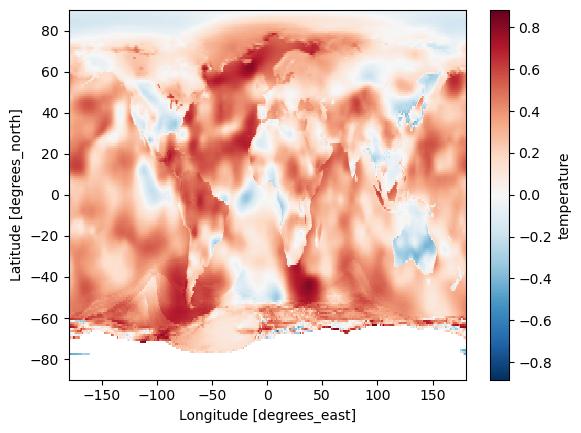

In [71]:
ar1.plot()

In [76]:
ar1.min(), ar1.max()

(<xarray.DataArray 'temperature' ()> Size: 8B
 array(-0.73113891),
 <xarray.DataArray 'temperature' ()> Size: 8B
 array(0.88341849))

In [77]:
N = 30
N_eff = N * (1-ar1)/(1+ar1)
# Ensure N_eff does not exceed N
N_eff = xr.where(N_eff > N, N, N_eff)

In [79]:
from functools import partial

In [113]:
ks_sn_crit_partial = partial(ks_sn_crit_n_eff, p=0.01)

In [114]:
sn_crit = N_eff.to_dataset().map(ks_sn_crit_partial).temperature

In [115]:
sn_crit

<xarray.DataArray 'temperature' (lat: 180, lon: 360)> Size: 518kB
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.76298471, 0.76298471, 0.76298471, ..., 0.76298471, 0.76298471,
        0.76298471],
       [0.76298471, 0.76298471, 0.76298471, ..., 0.76298471, 0.76298471,
        0.76298471],
       [0.76298471, 0.76298471, 0.76298471, ..., 0.76298471, 0.76298471,
        0.76298471]])
Coordinates:
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 1kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5

In [118]:
sn_crit.median()

<xarray.DataArray 'temperature' ()> Size: 8B
array(0.99976363)

In [122]:
import cartopy.crs as ccrs

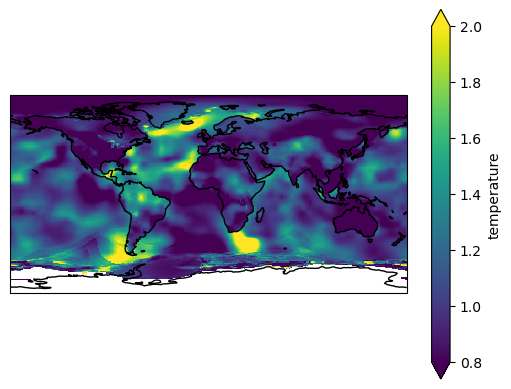

In [123]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
sn_crit.plot(vmin=0.8, vmax=2, ax=ax)
ax.coastlines()

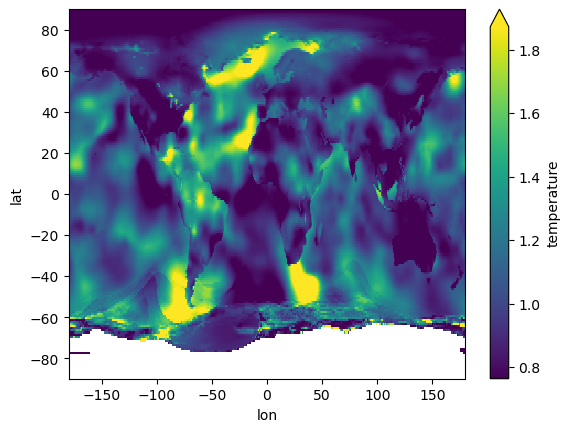

In [120]:
sn_crit.plot(robust=True)

In [131]:
def lag_one_autocorr(da):
    """
    Computes the lag-1 autocorrelation along the time dimension for an xarray DataArray.

    Parameters:
        da (xarray.DataArray): Input data with time as a dimension.

    Returns:
        xarray.DataArray: Lag-1 autocorrelation at each spatial point.
    """
    mean_x = da.mean(dim="time")
    num = ((da.shift(time=-1) - mean_x) * (da - mean_x)).sum(dim="time")
    den = ((da - mean_x) ** 2).sum(dim="time")
    
    return (num / den)#.isel(time=0)  # Drop the shifted time dimension

In [135]:
lag1 = np.abs(lag_one_autocorr(data_ds).compute())

In [136]:
N_eff = N * (1-lag1)/(1+lag1)

In [ ]:
partial(ks_sn_crit_n_eff, p=0.01)

In [140]:
ks_sn_crit_n_eff

<function __main__.ks_sn_crit_n_eff(n_eff, p=0.01)>

In [147]:
sn_crit  = xr.apply_ufunc(ks_sn_crit_n_eff, 
        N_eff)

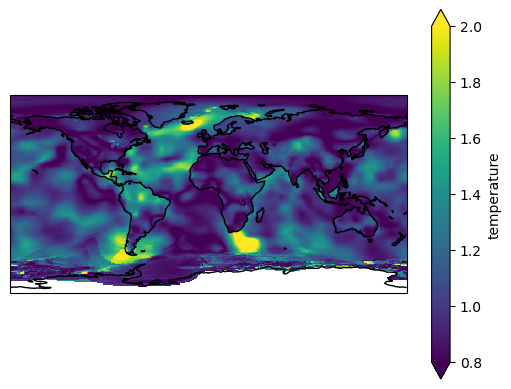

In [151]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
sn_crit.plot(vmin=0.8, vmax=2, ax=ax)
ax.coastlines()